In [2]:
from __future__ import absolute_import, division, print_function

# Import Tensorflow and Tensorflow Datasets

import tensorflow as tf
import tensorflow_datasets as tfds
#tf.logging.set_verbosity(tf.logging.ERROR)

# Helper libraries

import math
import numpy as np
import matplotlib.pyplot as plt

# Improve progresse bar display

import tqdm
import tqdm.auto
tqdm.tqdm = tqdm.auto.tqdm

print(tf.__version__)

#tf.enable_eager_execution()

2.11.0


In [2]:
#dataset, metadata = tfds.load('fashion_mnist',  as_supervised=True, with_info=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling C:\Users\lechiffre\tensorflow_datasets\fashion_mnist\3.0.1.incompleteEF2RUA\fashion_mnist-train.tfre…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling C:\Users\lechiffre\tensorflow_datasets\fashion_mnist\3.0.1.incompleteEF2RUA\fashion_mnist-test.tfrec…

Dataset fashion_mnist downloaded and prepared to C:\Users\lechiffre\tensorflow_datasets\fashion_mnist\3.0.1. Subsequent calls will reuse this data.


In [3]:
train_dataset, test_dataset = dataset['train'], dataset['test']

In [4]:
class_name = ['T-shirt/top', 'Trouver', 'Pullover', 'Dress', 'Coast',
              'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Exploration de données

In [6]:
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples
print("number of training examples: {}".format(num_train_examples))
print("number of test examples: {}".format(num_test_examples))

number of training examples: 60000
number of test examples: 10000


### Traitement de données

#### les valeurs de chaque pixel est un entier entre [0, 255] pour un bon model nous devons la normaliser entre [0, 1]

In [7]:
def normalize(images, labels):
    images = tf.cast(image, tf.float32)
    images /= 255
    return images, labels

# The map function applies the normalize function to each element in the train and test datasets

train_dataset = train_dataset.map(normalize)
test_dataset = test_dataset.map( normalize)

NameError: in user code:

    File "C:\Users\lechiffre\AppData\Local\Temp\ipykernel_9556\54444591.py", line 2, in normalize  *
        images = tf.cast(image, tf.float32)

    NameError: name 'image' is not defined


#### Explore the processed data

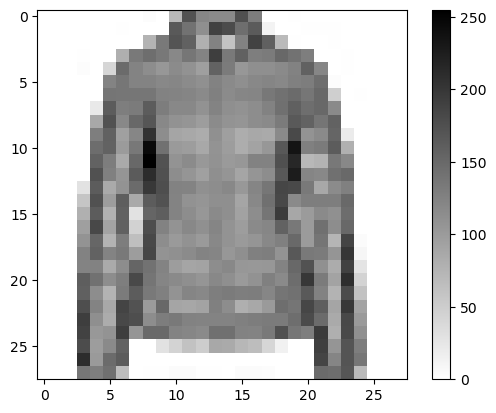

In [11]:
# Take a single image, and remove the color dimension by reshaping

for image, label in test_dataset.take(1):
    break
image = image.numpy().reshape((28, 28))

#plot the image viola a piece of fashion  clothing

plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

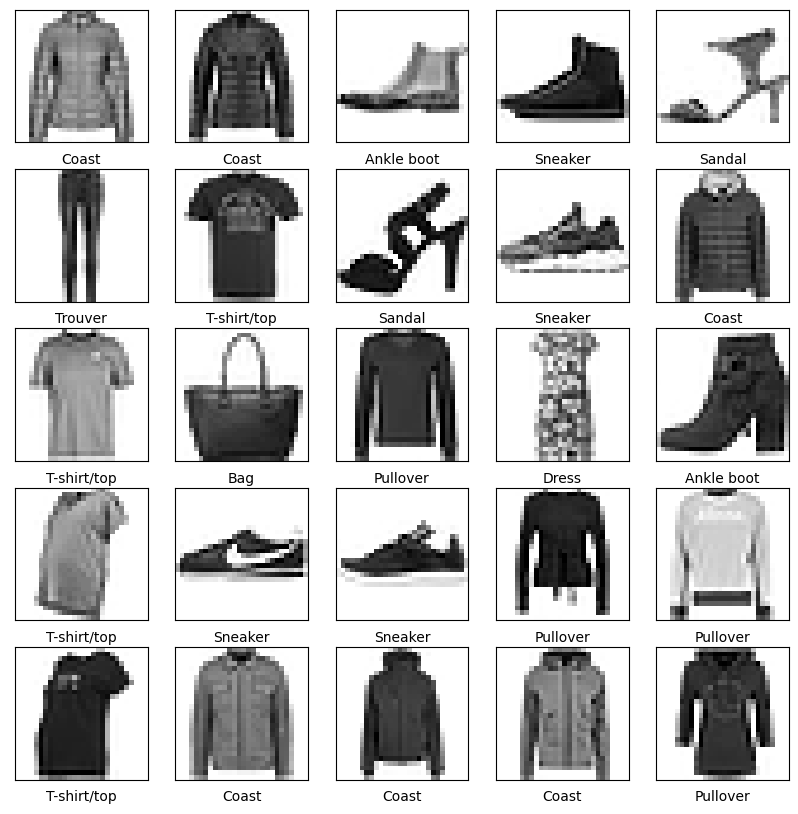

In [14]:
plt.figure(figsize=(10, 10))
i = 0
for (image, label) in test_dataset.take(25):
    image = image.numpy().reshape((28, 28))
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap=plt.cm.binary)
    plt.xlabel(class_name[label])
    i += 1 
plt.show()

### construction du model

In [15]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [17]:
model.compile(optimizer='adam',
             loss = 'sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [18]:
BATCH_SIZE = 32
train_dataset = train_dataset.repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

In [19]:
model.fit(train_dataset, epochs=5, steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))

Epoch 1/5
1875/1875 [==============================] - 4s 1ms/step - loss: 3.0860 - accuracy: 0.6863
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.7422 - accuracy: 0.7606
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6098 - accuracy: 0.7975
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5656 - accuracy: 0.8117
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5453 - accuracy: 0.8206


### evaluate accuarcy

In [20]:
test_loss, test_accuracy = model.evaluate(test_dataset, steps=math.ceil(num_test_examples/32))
print('Accuracy on test dataset:', test_accuracy)

313/313 [==============================] - 1s 1ms/step - loss: 0.5990 - accuracy: 0.8185
Accuracy on test dataset: 0.8184999823570251


### Make prediction and explore

In [22]:
for test_images, test_labels in test_dataset.take(1):
    test_images = test_images.numpy()
    test_labels = test_labels.numpy()
    predictions = model.predict(test_images)

1/1 [==============================] - 0s 67ms/step


In [23]:
predictions.shape

(32, 10)

In [24]:
predictions[0]

array([0.01855122, 0.00996431, 0.13803408, 0.03901797, 0.6151367 ,
       0.01849673, 0.12532006, 0.01211263, 0.01714754, 0.00621877],
      dtype=float32)

In [25]:
np.argmax(predictions[0])

4

In [26]:
test_labels[0]

4

In [3]:
tf.test.is_gpu_avialable()

AttributeError: module 'tensorflow._api.v2.test' has no attribute 'is_gpu_avialable'

In [ ]:
pip install 